In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.dates as mdates

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

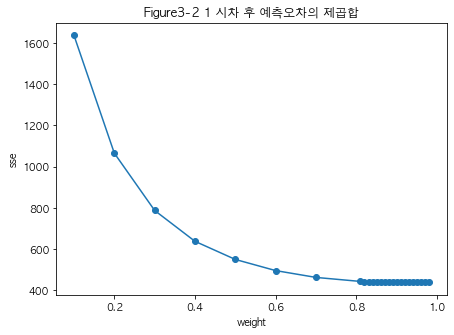

In [2]:
# Example 3.1
z = []

with open('../data/mindex.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1986", periods=len(z), freq="MS")
data = pd.Series(z, index)

w1 = np.arange(0.1, 0.8, 0.1)
w2 = np.arange(0.81, 0.99, 0.01)
w = np.hstack([w1, w2])

residuals = []
for w_ in w:
    model = SimpleExpSmoothing(data, initialization_method="heuristic")
    results = model.fit(smoothing_level=w_, optimized=False)
    residuals.append(np.sum(results.resid**2))


fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(w, residuals, 'o-')
ax.set_xlabel("weight")
ax.set_ylabel("sse")
ax.set_title("Figure3-2 1 시차 후 예측오차의 제곱합")
plt.show()

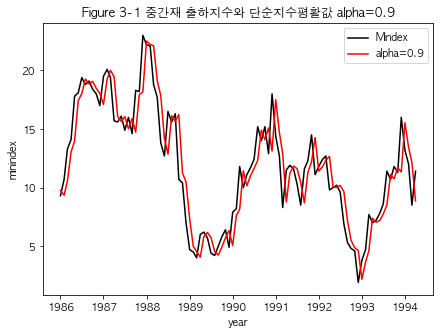

In [3]:
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic")
results = model.fit(smoothing_level=0.9, optimized=False)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Mindex")
ax.plot(results.fittedvalues, 'red', label="alpha=0.9")
ax.set_xlabel("year")
ax.set_ylabel("minindex")
ax.set_title("Figure 3-1 중간재 출하지수와 단순지수평활값 alpha=0.9")
plt.legend()
plt.show()

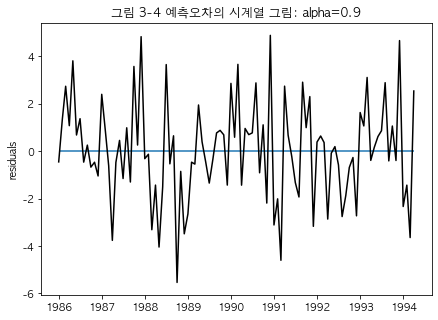

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("그림 3-4 예측오차의 시계열 그림: alpha=0.9")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

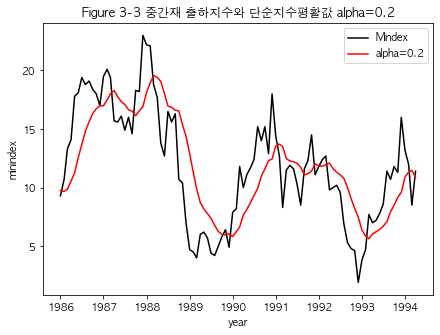

In [5]:
fit1 = SimpleExpSmoothing(data, initialization_method="heuristic")
results = model.fit(smoothing_level=0.2, optimized=False)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Mindex")
ax.plot(results.fittedvalues, 'red', label="alpha=0.2")
ax.set_xlabel("year")
ax.set_ylabel("minindex")
ax.set_title("Figure 3-3 중간재 출하지수와 단순지수평활값 alpha=0.2")
plt.legend()
plt.show()

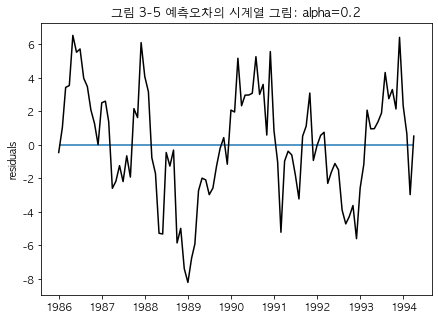

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("그림 3-5 예측오차의 시계열 그림: alpha=0.2")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

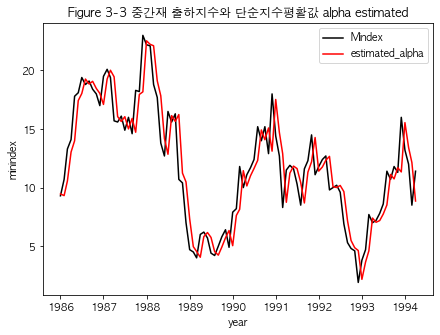

In [7]:
fit3 = SimpleExpSmoothing(data, initialization_method="heuristic")
results = model.fit()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Mindex")
ax.plot(results.fittedvalues, 'red', label="estimated_alpha")
ax.set_xlabel("year")
ax.set_ylabel("minindex")
ax.set_title("Figure 3-3 중간재 출하지수와 단순지수평활값 alpha estimated")
plt.legend()
plt.show()

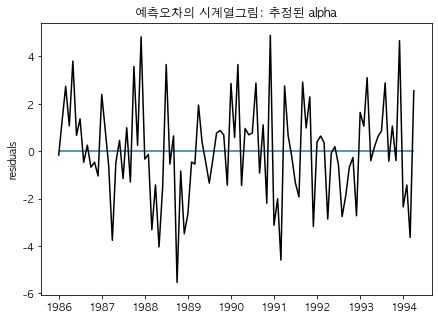

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("예측오차의 시계열그림: 추정된 alpha")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

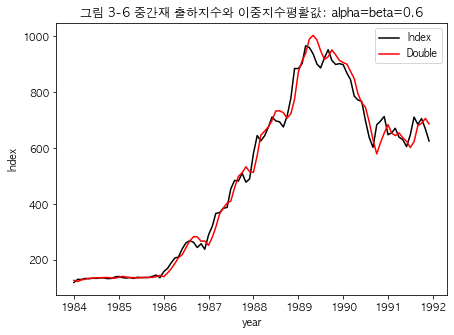

In [9]:
# Example 3.2
z = []

with open('../data/stock.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1984", periods=len(z), freq="MS")
data = pd.Series(z, index)

fit4 = Holt(data, initialization_method="heuristic")
results = fit4.fit(smoothing_level=0.6, smoothing_trend=0.2, optimized=False)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Index")
ax.plot(results.fittedvalues, 'red', label="Double")
ax.set_xlabel("year")
ax.set_ylabel("Index")
ax.set_title("그림 3-6 중간재 출하지수와 이중지수평활값: alpha=beta=0.6")
plt.legend()
plt.show()

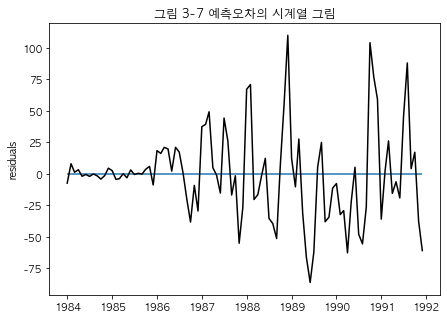

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("그림 3-7 예측오차의 시계열 그림")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

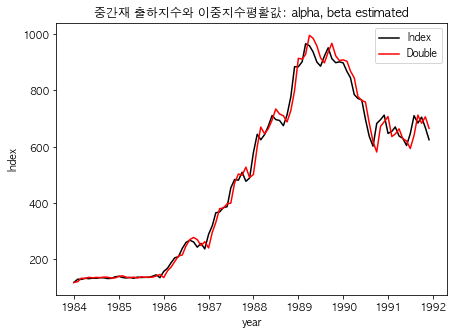

In [11]:
fit5 = Holt(data, initialization_method="heuristic")
results = fit5.fit()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Index")
ax.plot(results.fittedvalues, 'red', label="Double")
ax.set_xlabel("year")
ax.set_ylabel("Index")
ax.set_title("중간재 출하지수와 이중지수평활값: alpha, beta estimated")
plt.legend()
plt.show()

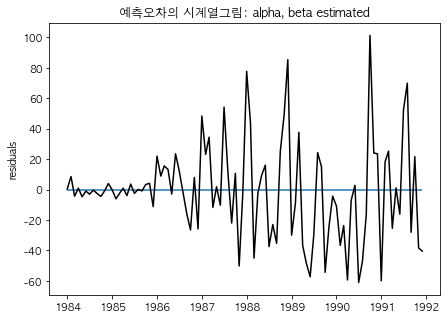

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("예측오차의 시계열그림: alpha, beta estimated")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

/Users/jonghyun/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


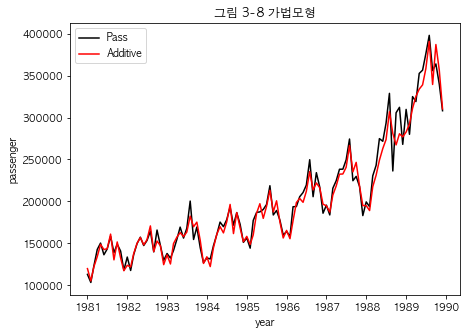

In [13]:
z = []

with open('../data/koreapass.txt') as f:
    for line in f.readlines():
        for elem in line.rstrip().split(" "):
            if len(elem):
                z.append(float(elem))

index = pd.date_range(start="1981", periods=len(z), freq="MS")
data = pd.Series(z, index)

fit6 = ExponentialSmoothing(data, 
                            initialization_method="heuristic", 
                            seasonal="add")
results = fit6.fit()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Pass")
ax.plot(results.fittedvalues, 'red', label="Additive")
ax.set_xlabel("year")
ax.set_ylabel("passenger")
ax.set_title("그림 3-8 가법모형")
plt.legend()
plt.show()

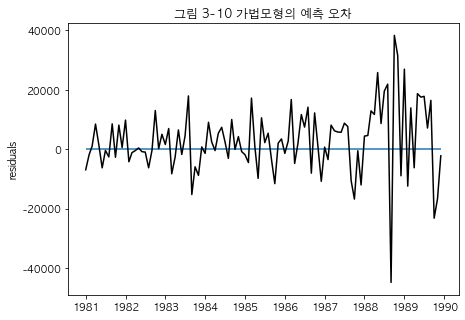

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("그림 3-10 가법모형의 예측 오차")
ax.hlines(0, min(data.index), max(data.index))
plt.show()

/Users/jonghyun/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


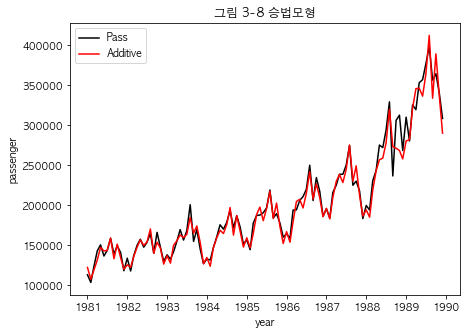

In [15]:
fit6 = ExponentialSmoothing(data, 
                            initialization_method="heuristic", 
                            seasonal="mul")
results = fit6.fit()

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data, 'black', label="Pass")
ax.plot(results.fittedvalues, 'red', label="Additive")
ax.set_xlabel("year")
ax.set_ylabel("passenger")
ax.set_title("그림 3-8 승법모형")
plt.legend()
plt.show()

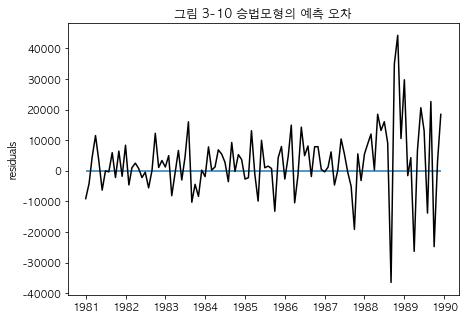

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(results.resid, 'black')
ax.set_ylabel("residuals")
ax.set_title("그림 3-10 승법모형의 예측 오차")
ax.hlines(0, min(data.index), max(data.index))
plt.show()